2-link arm model in jax

In [1]:
import jax
from jax import numpy as np
from jax.lax import scan
from jax import vmap, jit

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_palette("RdYlBu", 8)

import sys
sys.path.append("./src/")
import arm_model

/home/mkp127/anaconda3/lib/python3.7/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
with open('./data/arm_dt10.pickle', 'rb') as handle:
    d = pickle.load(handle)
print(d.keys())
m_trj = 100 * d['torques']

dict_keys(['torques', 'positions', 'states'])


In [3]:
x_trj, y_trj = arm_model.rollout_batch(arm_model.x0, m_trj)

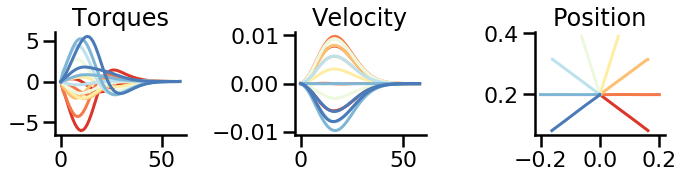

In [6]:
f, ax = plt.subplots(1,3, figsize=(10,3))
for i in range(8):
    ax[0].plot(m_trj[i], c=sns.color_palette()[i])
    ax[1].plot(np.diff(y_trj[i], axis=0), c=sns.color_palette()[i])
    ax[2].plot(y_trj[i,:,0], y_trj[i,:,1])
    
ax[0].set_title("Torques")
ax[1].set_title("Velocity")
ax[2].set_title("Position")
sns.despine()
f.tight_layout()